# Plantear el problema

Suponga que un pez nada río arriba con velocidad relativa al agua v y que la corriente del río tiene velocidad -vc (el signo negativo indica que la velocidad de la corriente es en dirección opuesta a la del pez).   

La energía empleada en recorrer una distancia d a contracorriente es directamente proporcional al tiempo
requerido para recorrer la distancia d y el cubo de la velocidad.   

¿Qué velocidad v minimiza la energía empleada en nadar esta distancia?


In [ ]:
# definir funcion
k = 1
velocidad_rio = 10  # (en kilómetros por hora)
d = 1  # (en kilómetros)

def energia(velocidad_pez):
    return k*(d/(velocidad_pez-velocidad_rio))*velocidad_pez**3

In [ ]:
# evaluar la funcion
energia(15)


675.0

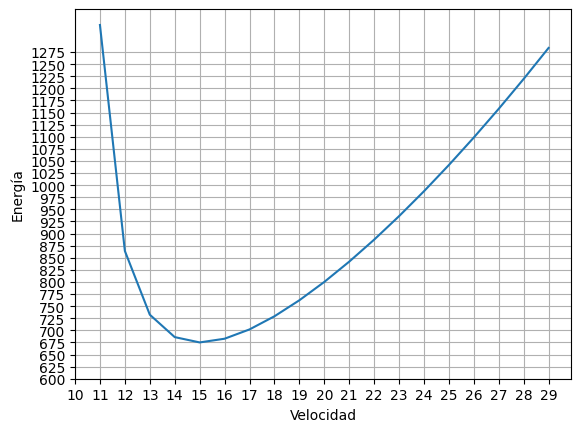

In [ ]:
# graficar la funcion
import numpy as np
import matplotlib.pyplot as plt

dominio = np.arange(11, 30)

rango = energia(dominio)

plt.plot(dominio, rango)  # gráfico de líneas con la función plot


plt.xlabel('Velocidad')

plt.ylabel('Energía')

plt.grid(alpha = 1)  # poner la cuadrícula

plt.yticks(np.arange(600, 1300, 25))  # metrizar el eje vertical

plt.xticks(np.arange(10, 30, 1))  # metrizar el eje horizontal

plt.show()



In [ ]:
# derivar e igualar a cero para encontrar los puntos críticos

from sympy import * # en sympy las dos son con y

k,d, velocidad_pez, velocidad_rio, energia = var("k,d, velocidad_pez, velocidad_rio, energia")
d = 1
velocidad_rio = 10
k = 1

energia = k*(d/(velocidad_pez-velocidad_rio))*velocidad_pez**3

derivada = diff(energia, velocidad_pez)

ecuacion = Eq(derivada, 0)

solve(ecuacion, velocidad_pez)[1].evalf()




15.0000000000000